In [16]:
import pandas as pan
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plotter
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB

In [2]:
matrix_data = pan.read_csv("airline_tweets.csv")

In [3]:
matrix_data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


<Axes: xlabel='airline_sentiment', ylabel='count'>

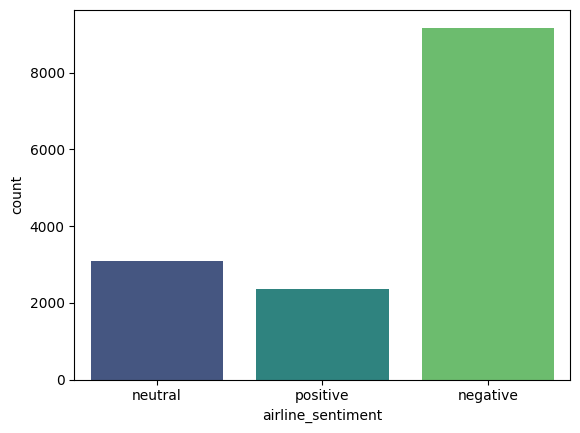

In [4]:
sns.countplot(x = matrix_data["airline_sentiment"], palette = "viridis")

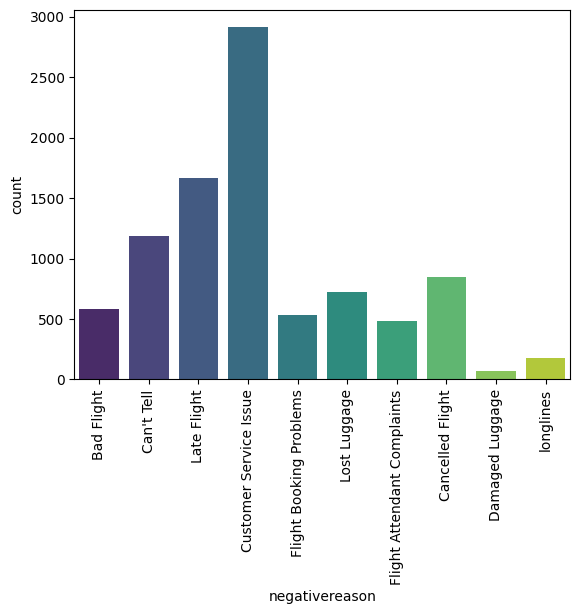

In [5]:
sns.countplot(x = matrix_data["negativereason"], palette = "viridis")
plotter.xticks(rotation = 90);

<Axes: xlabel='airline', ylabel='count'>

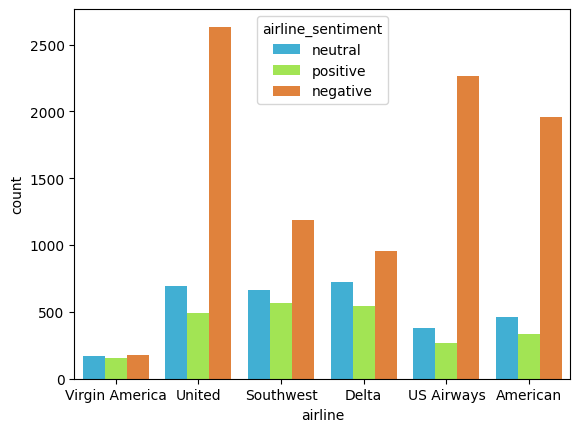

In [6]:
sns.countplot(x = matrix_data["airline"], hue = matrix_data["airline_sentiment"], palette = "turbo")

In [7]:
features = matrix_data["text"]
label = matrix_data["airline_sentiment"]

In [8]:
feature_train, feature_test, label_train, label_test = train_test_split(features, label, test_size = 0.1, random_state = 42)
t_vectorizer = TfidfVectorizer(stop_words = "english")
t_feature_train = t_vectorizer.fit_transform(feature_train)
t_feature_test = t_vectorizer.transform(feature_test)

In [9]:
#multinomial naive bayes
nb_sub_gridder = MultinomialNB()
param_grid = {"alpha": [1e-09, 1e-05, 1e-03, 1, 10, 100]}
nb_gridder = GridSearchCV(nb_sub_gridder, param_grid, cv = 5, verbose = 1, n_jobs = 7)
nb_gridder.fit(t_feature_train, label_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=MultinomialNB(), n_jobs=7,
             param_grid={'alpha': [1e-09, 1e-05, 0.001, 1, 10, 100]},
             verbose=1)

              precision    recall  f1-score   support

    negative       0.76      0.93      0.84       924
     neutral       0.58      0.34      0.43       302
    positive       0.72      0.50      0.59       238

    accuracy                           0.74      1464
   macro avg       0.69      0.59      0.62      1464
weighted avg       0.72      0.74      0.71      1464



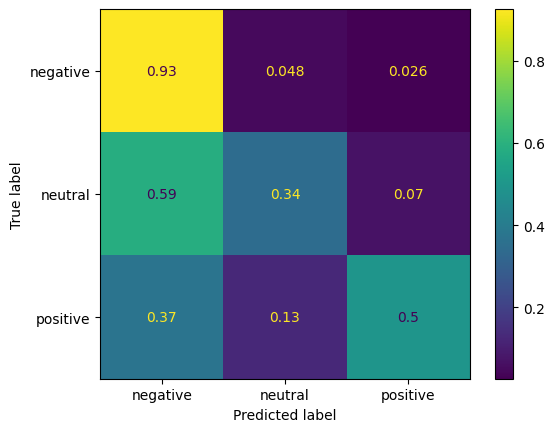

In [13]:
def performance(estimator):
    # print(estimator.best_params_)
    estimator_preds = estimator.predict(t_feature_test)
    ConfusionMatrixDisplay.from_predictions(label_test, estimator_preds, normalize = "true")
    print(classification_report(label_test, estimator_preds))

performance(nb_gridder)

              precision    recall  f1-score   support

    negative       0.82      0.94      0.88       924
     neutral       0.69      0.49      0.57       302
    positive       0.77      0.63      0.69       238

    accuracy                           0.80      1464
   macro avg       0.76      0.69      0.71      1464
weighted avg       0.79      0.80      0.79      1464



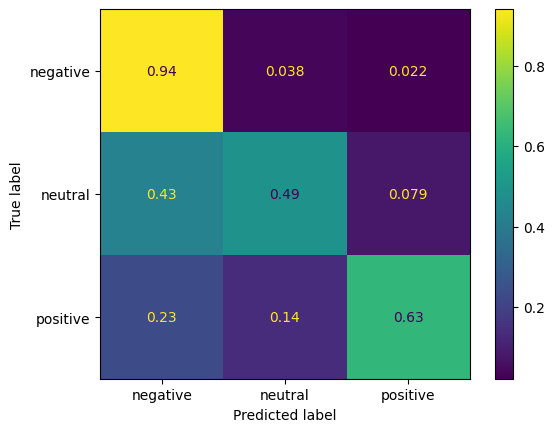

In [14]:
#logistic_regression
log_learner = LogisticRegressionCV(Cs = [0.01, 0.1, 1, 10, 100], max_iter = 1000000)
log_learner.fit(t_feature_train, label_train)
performance(log_learner)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\omoke\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\omoke\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\omoke\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_classes.py", line 274, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
                                           ^^^^^^^^^^^^^^^
  File "C:\Users\omoke\AppData\Roaming\Py

              precision    recall  f1-score   support

    negative       0.84      0.91      0.88       924
     neutral       0.66      0.52      0.58       302
    positive       0.74      0.69      0.71       238

    accuracy                           0.80      1464
   macro avg       0.75      0.71      0.72      1464
weighted avg       0.79      0.80      0.79      1464



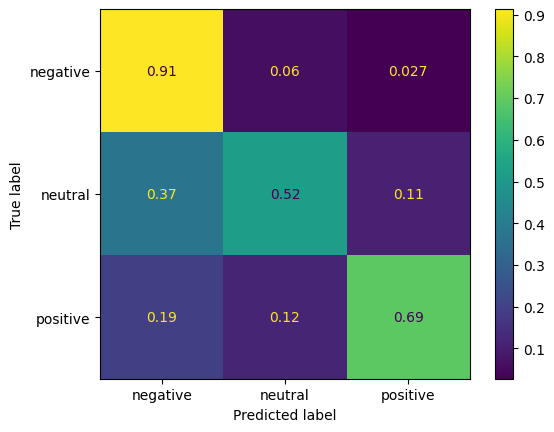

In [15]:
#linear svms
linear_sub_gridder = LinearSVC()
param_grid = {"C": [0.01, 0.1, 1, 2, 3, 10], "penalty": ["l1", "l2"]}
linear_gridder = GridSearchCV(linear_sub_gridder, param_grid, verbose = 1, n_jobs = 7)
linear_gridder.fit(t_feature_train, label_train)
performance(linear_gridder)

In [25]:
pipe = make_pipeline(TfidfVectorizer(stop_words = "english"), SVC(gamma = "scale", C = 2))
pipe.fit(features, label)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer(stop_words='english')),
                ('svc', SVC(C=2))])

In [33]:
pipe.predict(["My ball's are sagging"])

array(['negative'], dtype=object)